# Scenarios

The scenarios are taken from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections.

Modifications:
-   we set the STAUMIX values to maximally mixed for sleptons
-   we manually set the massses of all particles tagged with an @a or {M...} 

In [1]:
#%load_ext nb_black
import hepi


print(hepi.__version__)
import smpl
from smpl import data
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino/build/bin/resummino")
print(rs.default_resummino_runner.get_version())
print(rs.get_path())

test_lo = False
analyse  = True # else generation

/usr/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: xsec-explore-pdfs-dist.3-dirty is an invalid version and will not be supported in a future release
  warnings.warn(


dirty
resummino 3.1.1-dev
~/git/resummino/build/bin/resummino


/usr/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: xsec-explore-pdfs-dist.3-dirty is an invalid version and will not be supported in a future release
  warnings.warn(


# aNNLO+NNLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.............................................................................................................................................= 141 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141/141 [00:00<00:00, 302.76it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03800925010998782% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03776836129324675% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03643395751752275% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04180527233142186% vs scale:0.3368956659138532% to -0.17152811497472129%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/h

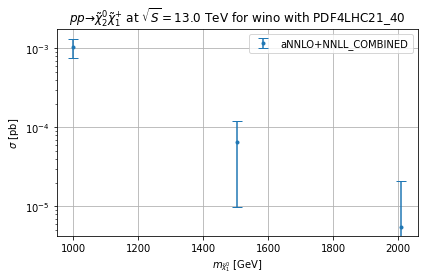

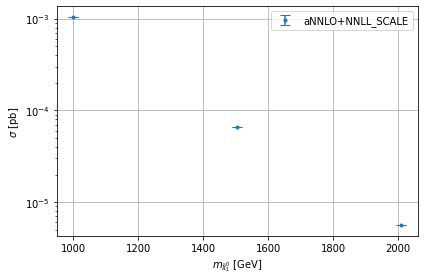

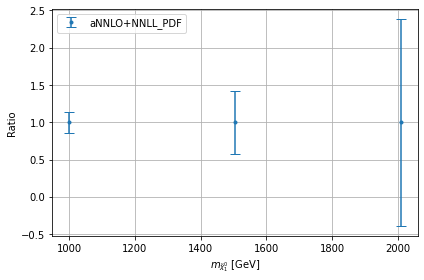

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.................................................................................................................................................................................................................................................................................................................................= 321 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 321/321 [00:00<00:00, 334.85it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038028093571059844% vs 9.540670598304949e-06% to pdf: -9.540670598304949e-06%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03839915455111566% vs 1.041986772655995e-05% to pdf: -1.041986772655995e-05%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03904664551081962% vs 1.2261904742564057e-05% to pdf: -1.2261904742564057e-05%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.039379826879633886% vs sc

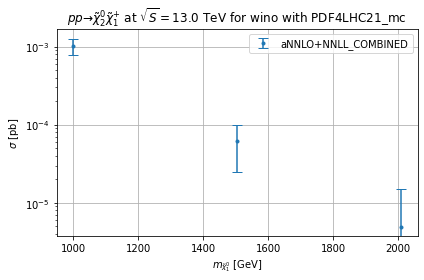

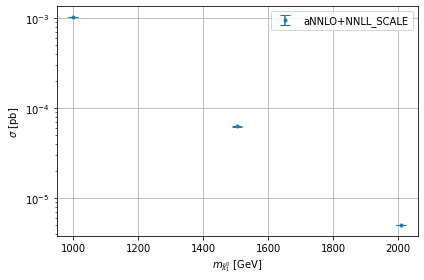

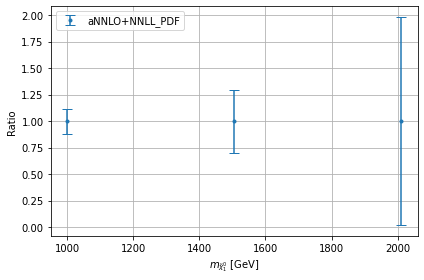

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...............................................................................................................= 111 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 302.96it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038330219564185045% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.04008589177666581% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.05168018690898477% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.042401256892593414% vs scale:0.34743194289481594% to -0.1542968473664677%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages

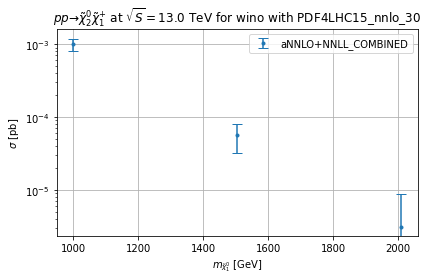

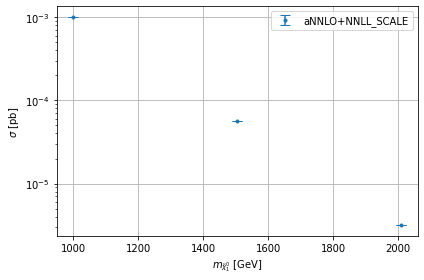

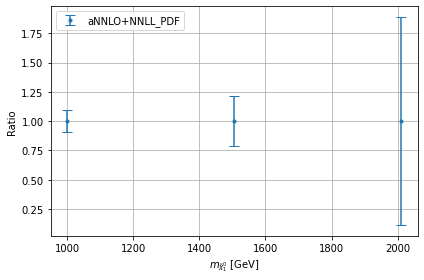

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...................................................................................................................................................................................................= 195 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 334.87it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03789676080472705% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03741104530097012% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03724803476321905% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04182135231762371% vs scale:0.35054388417652455% to -0.13705310773138746%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/

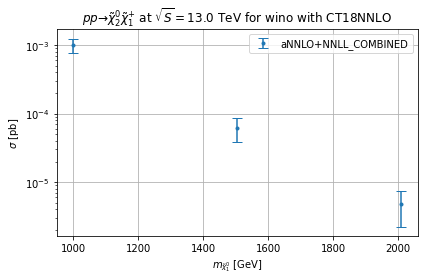

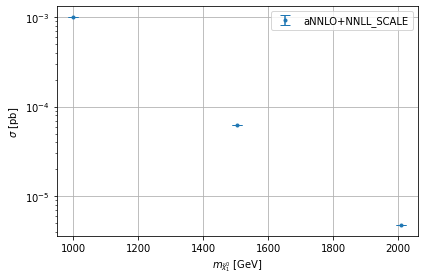

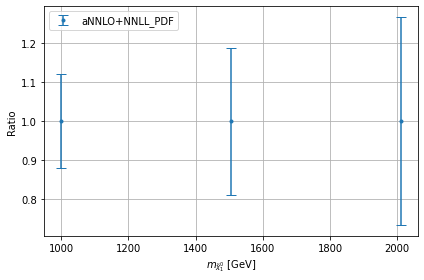

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.....................................................................................................................................................................................................................= 213 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 335.72it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03816547160213464% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03907816137691041% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03963081916152446% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04195575678754655% vs scale:0.38449929645088493% to -0.16438343829824917%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/

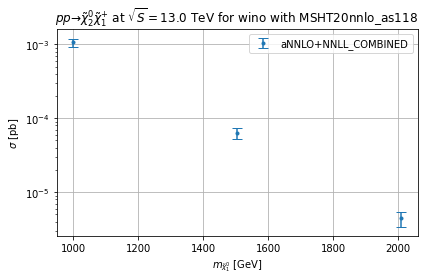

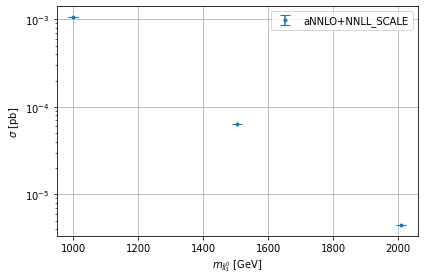

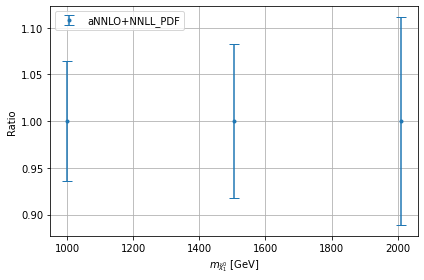

In [2]:
params = [
    "wino.slha",
]
energies = [13000,
            #13600
           ]
pss = [
    ( 1000023, +1000024),  # N1C1p
    #( 1000023, -1000024),  # N1C1m
    #(+1000024, -1000024),  # C1pC1m
]
pdfs = ["PDF4LHC21_40","PDF4LHC21_mc","PDF4LHC15_nnlo_30","CT18NNLO","MSHT20nnlo_as118"]
for energy in energies:
    for pa, pb in pss:
        for pdf in pdfs:
            hepi.set_output_dir(
                "output_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb) + "_" + pdf+ "/"
            )
            rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
            for param in params:
                i = hepi.Input(
                    hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    pdf,
                    pdf,
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
                li = [i]
                li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    np.linspace(1000,2010,3),
                )
                if not test_lo:

                    li = hepi.seven_point_scan(li)
                    li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                    if not analyse:
                        rs_dl = rs.run(li, skip=False, run=False, parse=False)
                    else:
                        rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                        rs_dl = hepi.pdf_errors(li,rs_dl)
                        rs_dl = hepi.scale_errors(li,rs_dl)
                        rs_dl = hepi.combine_errors(rs_dl)
                        hepi.title(li[0])
                        #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                        #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_SCALE",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_PDF",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)

# NLO+NLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...............................................................................................................= 111 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 212.76it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038222858640920225% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03935899883790293% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.04302339315572162% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:NLO_PLUS_NLL 0.13891286389768187% vs scale:0.8694896505925649% to -2.6375819204339237%
  warnings.warn(


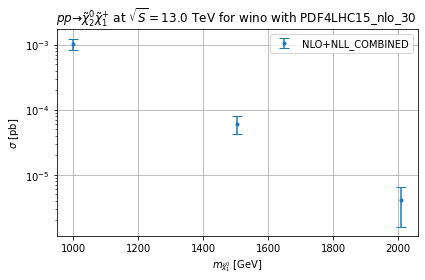

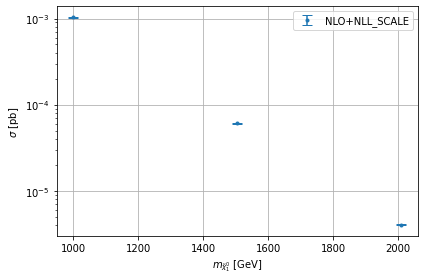

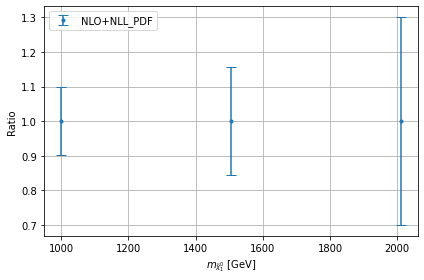

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...................................................................................................................................................................................................= 195 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 334.41it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038002646619275195% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.037457542113956487% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03705890070026622% vs 0.0% to pdf: -0.0%
  warnings.warn(


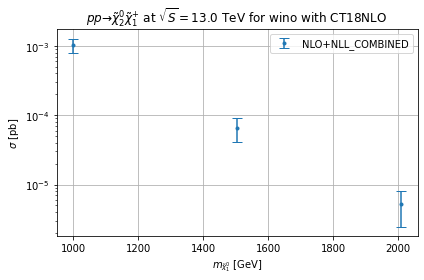

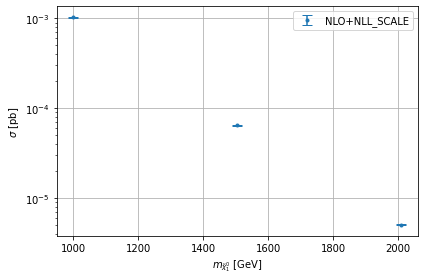

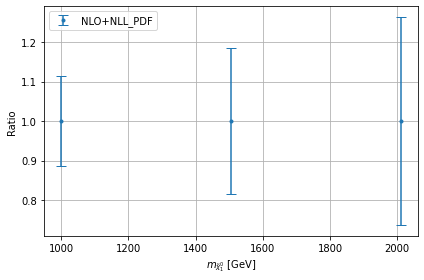

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.....................................................................................................................................................................................................................= 213 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 301.39it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038135141614718725% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03945767968092352% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.04097140776755224% vs 0.0% to pdf: -0.0%
  warnings.warn(


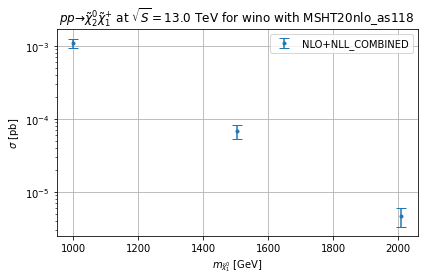

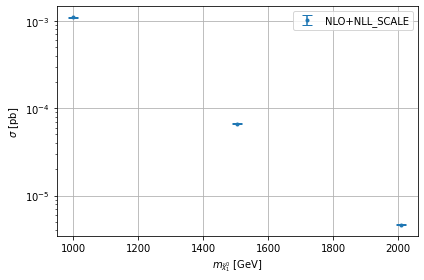

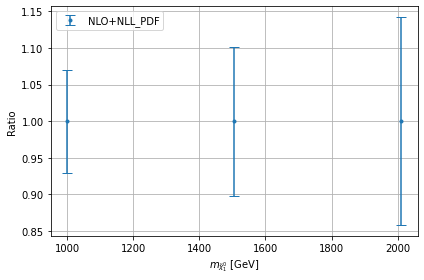

In [3]:
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    #( 1000022, -1000024),  # N1C1m
    #(+1000024, -1000024),  # C1pC1m
]
energies = [13000,
            #13600
           ]
pdfs = ["PDF4LHC15_nlo_30",
    "CT18NLO","MSHT20nlo_as118"]

for energy in energies:
    for pa, pb in pss:
        for pdf in pdfs:
            hepi.set_output_dir(
                "output_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb) + "_" + pdf+ "/"
            )
            rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
            for param in params:
                i = hepi.Input(
                    hepi.Order.LO if test_lo else hepi.Order.NLO_PLUS_NLL,
                    energy,
                    pa,
                    pb,
                    param,
                    pdf,
                    pdf,
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
                li = [i]
                li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    np.linspace(1000,2010,3),
                )
                if not test_lo:

                    li = hepi.seven_point_scan(li)
                    li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                    if not analyse:
                        rs_dl = rs.run(li, skip=False, run=False, parse=False)
                    else:
                        rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                        rs_dl = hepi.pdf_errors(li,rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        rs_dl = hepi.scale_errors(li,rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        rs_dl = hepi.combine_errors(rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        hepi.title(li[0])
                        #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                        #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_COMBINED",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_SCALE",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_PDF",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)

                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)